# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology

## Assignment 2

In [1]:
#@title Enter your information & "RUN the cell!!"

student_id =  99104781 #@param {type:"integer"}
student_name = "Mohammad Hossein Shafizadegan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99104781
your name: Mohammad Hossein Shafizadegan


In [1]:
# import anu required library

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# FitzHugh-Nagumo Model

## Question 2

Solve and simulate the model differential equations then draw trajectories for several initial points.

\begin{gather}
    $\dot{V} = V - V^3 - w  + I$ \\
    $\dot{w} = 0.08(V+0.7-0.8w)$
\end{gather}

In [21]:
def diff_equations(y, t, Iext):
    V,w = y # unpack state variables
    dVdt = V - V**3 - w + Iext
    dwdt = 0.08 * (V + 0.7 - 0.8*w)
    return [dVdt, dwdt]

def FitzHugh_Nagumo(init_v, init_w, Iext, T0):

    dt = 0.01
    T  = math.ceil(T0/dt)  # [ms]

    t = np.arange(0,T)*dt

    y = odeint(diff_equations, [init_v, init_w], t, args=(Iext,))

    return y[:,0], y[:,1]

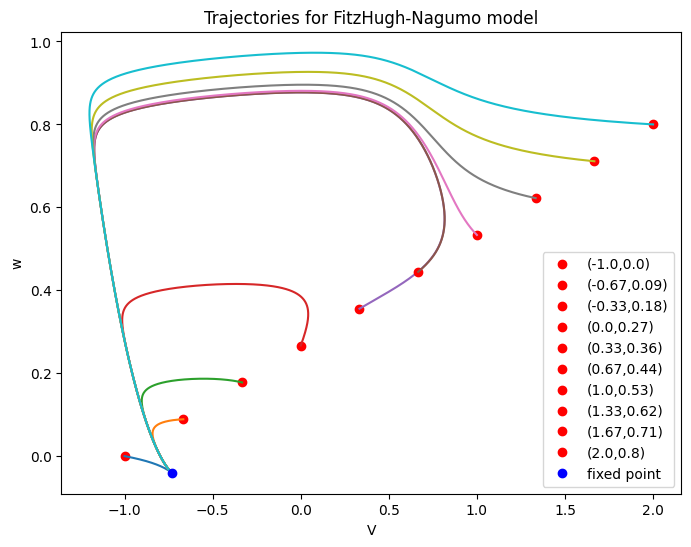

In [91]:
init_v = np.linspace(-1,2,10)
init_w = np.linspace(0,0.8,10)
Iext = 0.3
T0 = 100

plt.rcParams["figure.figsize"]=(8,6)
for i in range(10):
    v, w = FitzHugh_Nagumo(init_v[i],init_w[i],Iext,T0)
    plt.plot(init_v[i],init_w[i],'ro',label="(" + str(round(init_v[i],2))+","+str(round(init_w[i],2)) + ")")
    plt.plot(v,w)

plt.plot(-0.732,-0.04,'bo',label="fixed point")
plt.title("Trajectories for FitzHugh-Nagumo model")
plt.xlabel("V")
plt.ylabel("w")
plt.legend()

Text(0, 0.5, 'w')

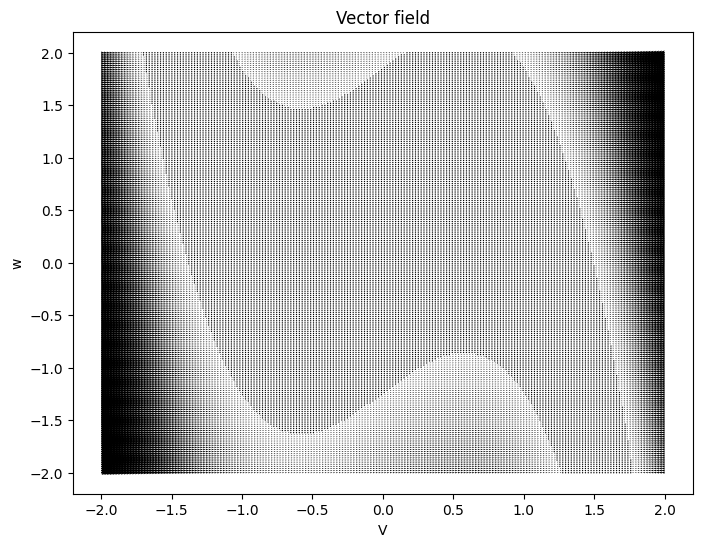

In [55]:
# Define grid points
w = np.linspace(-2,2,200)
v = np.linspace(-2,2,200)
V,W = np.meshgrid(v,w)

# Compute vector field
dv,dw = diff_equations([V,W],0,Iext)

# Plot vector field
plt.quiver(V,W,dv,dw)
plt.title("Vector field")
plt.xlabel("V")
plt.ylabel("w")

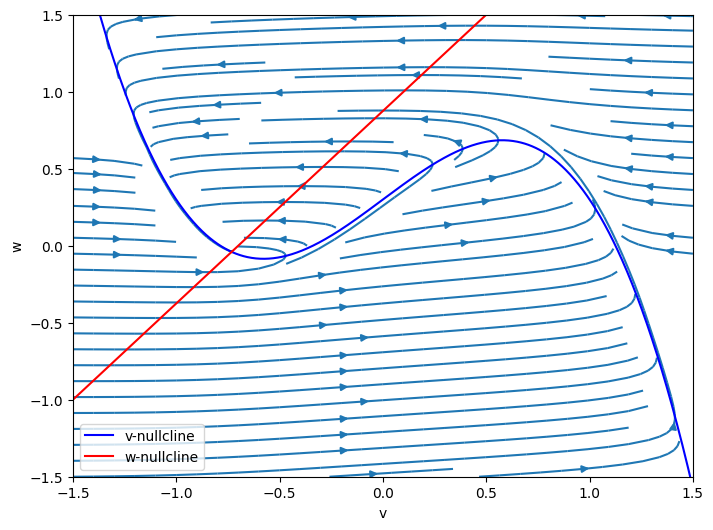

In [22]:
w = np.linspace(-1.5,1.5,1000)
v = np.linspace(-1.5,1.5,1000)
V,W = np.meshgrid(v,w)

Iext = 0.3

# Compute vector field
dv,dw = diff_equations([V,W],0, Iext)

# Plot vector field
plt.streamplot(V,W,dv,dw)

# Plot nullclines
plt.plot(v,v-v**3+Iext,'b',label='v-nullcline')
plt.plot(v,(v+0.7)/0.8,'r',label='w-nullcline')
plt.xlabel('v')
plt.ylabel('w')
plt.legend()
plt.ylim([-1.5, 1.5])
plt.show()

(1.0, 1.4)

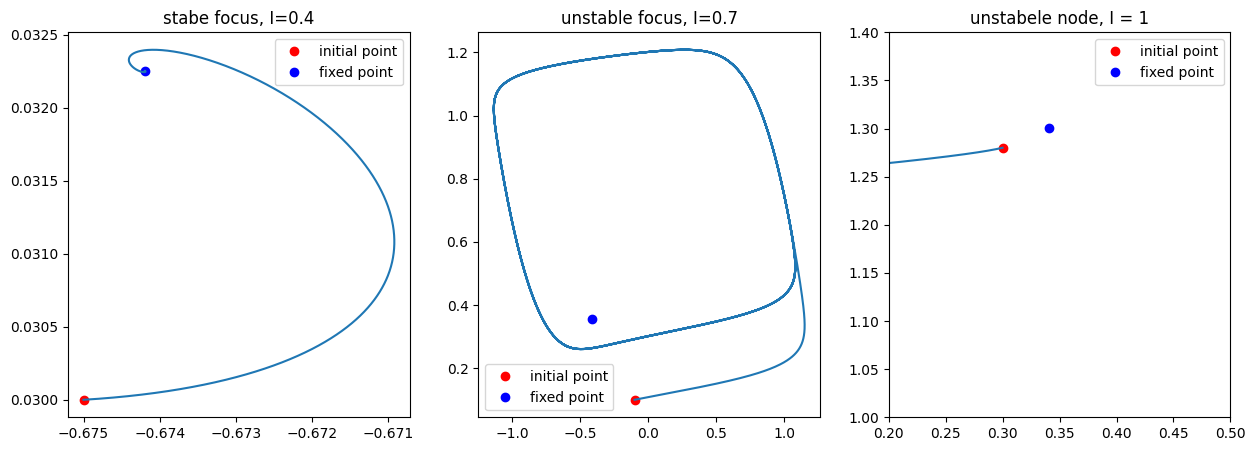

In [12]:
T0 = 200

plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(131)
v, w = FitzHugh_Nagumo(-0.675,0.03,0.4,T0)
plt.plot(-0.675,0.03,'ro',label="initial point")
plt.plot(v[-1], w[-1], 'bo', label="fixed point")
plt.plot(v,w)
plt.legend()
plt.title("stabe focus, I=0.4")
plt.subplot(132)
v, w = FitzHugh_Nagumo(-0.1,0.1,0.7,T0)
plt.plot(-0.1,0.1,'ro',label="initial point")
plt.plot(-0.415, 0.357, 'bo', label="fixed point")
plt.plot(v,w)
plt.title("unstable focus, I=0.7")
plt.legend()
plt.subplot(133)
v, w = FitzHugh_Nagumo(0.3,1.28,1,T0)
plt.plot(0.3,1.28,'ro',label="initial point")
plt.plot(0.341, 1.301, 'bo', label="fixed point")
plt.plot(v,w)
plt.title("unstabele node, I = 1")
plt.legend()
plt.xlim([0.2,0.5])
plt.ylim([1,1.4])

Text(0.5, 1.0, 'Trajectories for different initial points')

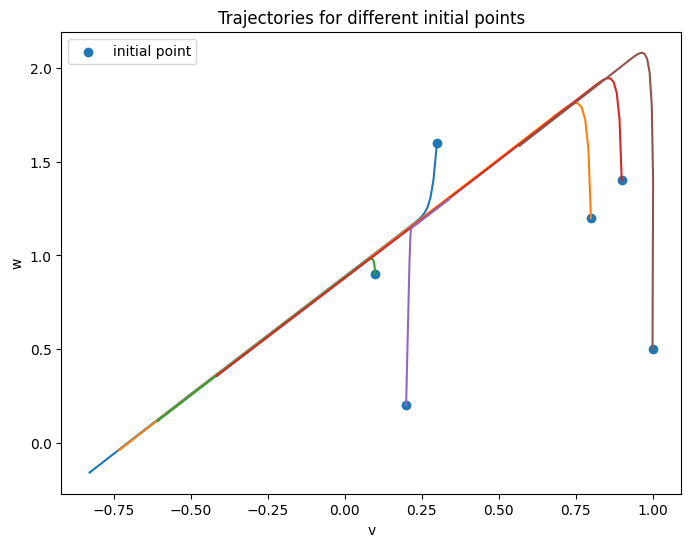

In [32]:
def diff_equations_2(y, t, Iext,a):
    V,w = y # unpack state variables
    dVdt = V - V**3 - w + Iext
    dwdt = a * (V + 0.7 - 0.8*w)
    return [dVdt, dwdt]

def FitzHugh_Nagumo_2(init_v, init_w, Iext, T0,a):

    dt = 0.01
    T  = math.ceil(T0/dt)  # [ms]

    t = np.arange(0,T)*dt

    y = odeint(diff_equations_2, [init_v, init_w], t, args=(Iext,a))

    return y[:,0], y[:,1]

Iext_2 = [0.1, 0.3, 0.5, 0.7, 1, 1.2]
init_v = [0.3, 0.8, 0.1, 0.9, 0.2, 1]
init_w = [1.6, 1.2, 0.9, 1.4, 0.2, 0.5]

plt.rcParams["figure.figsize"]=(8,6)
for i in range(len(Iext_2)):
    v, w = FitzHugh_Nagumo_2(init_v[i],init_w[i],Iext_2[i],T0,100)
    plt.plot(v,w)
plt.scatter(init_v, init_w, label="initial point")
plt.xlabel('v')
plt.ylabel('w')
plt.legend(numpoints=1)
plt.title('Trajectories for different initial points')

# Winner takes all neural network

\begin{align}
    \tau \frac{dE_1}{dt} = -E_1 + S(k_1-3E_2) \\
    \tau \frac{dE_2}{dt} = -E_2 + S(k_2-3E_1) \\
    S(x) = \begin{cases} \frac{Mx^N}{\sigma^N + x^N} \qquad & x \ge 0 \\ 0 & x<0\end{cases}
\end{align}

Text(0.5, 1.0, 'Trajectories for different initial points')

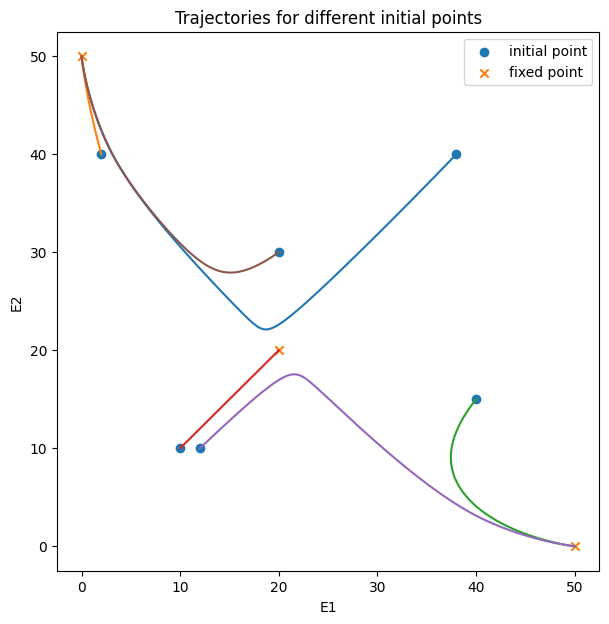

In [12]:
def S_x(x):
    sigma = 120
    N=2
    M = 100
    if(x>=0):
        return M*x**N/(sigma**N+x**N)
    else:
        return 0

def E_diff_equations(y, t, tau, k1, k2):
    E1,E2 = y # unpack state variables
    dE1dt = 1/tau * (-E1 + S_x(k1-3*E2))
    dE2dt = 1/tau * (-E2 + S_x(k2-3*E1))
    return [dE1dt, dE2dt]

def winner_takes_all(init_E1, init_E2, k1, k2, tau, T0):

    dt = 0.01
    T  = math.ceil(T0/dt)  # [ms]
    t = np.arange(0,T)*dt

    y = odeint(E_diff_equations, [init_E1, init_E2], t, args=(tau, k1, k2,))

    return y[:,0], y[:,1]

tau = 20
k1, k2 = 120, 120
T = 500
init_E1, init_E2 = [38, 2, 40, 10, 12, 20], [40, 40, 15, 10, 10, 30]

plt.rcParams["figure.figsize"]=(7,7)
for i in range(len(init_E1)):
    E1,E2 = winner_takes_all(init_E1[i], init_E2[i], k1, k2, tau, T)
    plt.plot(E1,E2)

plt.scatter(init_E1,init_E2,label="initial point")
plt.scatter([20, 0, 50],[20, 50, 0], label='fixed point', marker='x')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend(numpoints=1)
plt.title('Trajectories for different initial points')

Text(0.5, 1.0, 'Vector field of E1 and E2 and their nullclines')

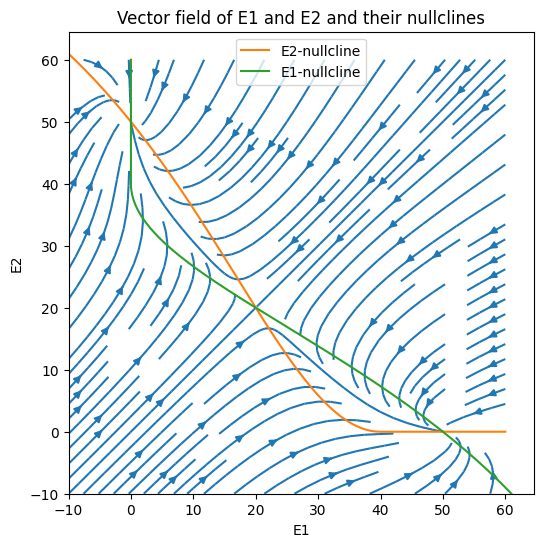

In [14]:
E1 = np.linspace(-10,60,1000)
E2 = np.linspace(-10,60,1000)

sigma = 120
N=2
M = 100
tau = 20
k1, k2 = 120, 120

# plotting vector field
e1, e2= np.meshgrid(E1,E2)
i1 = k2-3*e1
i2 = k1-3*e2
o1 = M*i1**N/(sigma**N+i1**N)
o2 = M*i2**N/(sigma**N+i2**N)
o1[i1 < 0] = 0
o2[i2 < 0] = 0
de1 = 1/tau * (-e1 + o2)
de2 = 1/tau * (-e2 + o1)
# Plot vector field
plt.rcParams["figure.figsize"]=(6,6)
plt.streamplot(e1,e2,de1,de2)

# plotting nullclines
indx1 = k2-3*E1
indx2 = k1-3*E2
out1 = M*indx1**N/(sigma**N+indx1**N)
out2 = M*indx2**N/(sigma**N+indx2**N)
out1[indx1 < 0] = 0
out2[indx2 < 0] = 0
plt.plot(E2, out1, label="E2-nullcline")
plt.plot(out2, E1, label="E1-nullcline")
plt.legend()
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Vector field of E1 and E2 and their nullclines')


Text(0.5, 1.0, 'initial value: E1=0.49, E2=0.51')

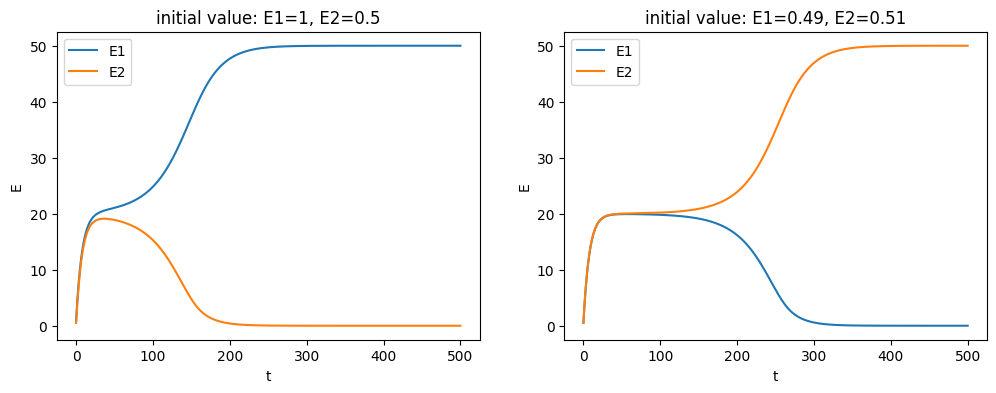

In [11]:
dt = 0.01
T0 = 500
T  = math.ceil(T0/dt)  # [ms]
t = np.arange(0,T)*dt
init_E1, init_E2 = [1, 0.49], [0.5, 0.51]
k1, k2 = 120, 120

E11,E12 = winner_takes_all(init_E1[0], init_E2[0], k1, k2, tau, T0)
E21,E22 = winner_takes_all(init_E1[1], init_E2[1], k1, k2, tau, T0)

plt.rcParams["figure.figsize"]=(12,4)
plt.subplot(121)
plt.plot(t,E11, label="E1")
plt.plot(t,E12, label="E2")
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.title('initial value: E1='+str(init_E1[0]) + ', E2=' +str(init_E2[0]))

plt.subplot(122)
plt.plot(t,E21, label="E1")
plt.plot(t,E22, label="E2")
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.title('initial value: E1='+str(init_E1[1]) + ', E2=' +str(init_E2[1]))

Text(0.5, 1.0, 'Vector field of E1 and E2 and their nullclines')

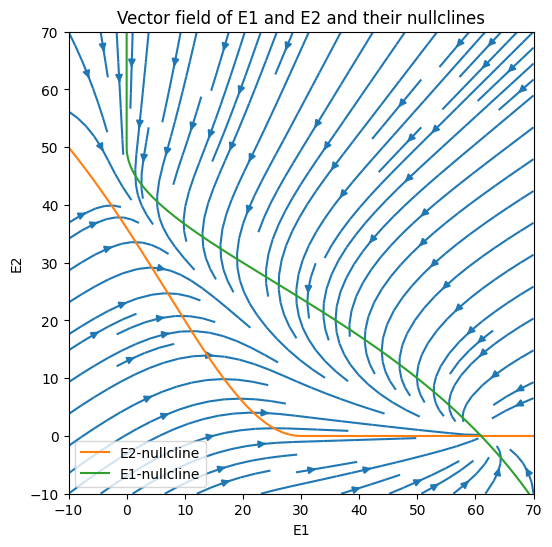

In [31]:
E1 = np.linspace(-10,70,1000)
E2 = np.linspace(-10,70,1000)

sigma = 120
N=2
M = 100
tau = 20
k1, k2 = 150, 90

# plotting vector field
e1, e2= np.meshgrid(E1,E2)
i1 = k2-3*e1
i2 = k1-3*e2
o1 = M*i1**N/(sigma**N+i1**N)
o2 = M*i2**N/(sigma**N+i2**N)
o1[i1 < 0] = 0
o2[i2 < 0] = 0
de1 = 1/tau * (-e1 + o2)
de2 = 1/tau * (-e2 + o1)
# Plot vector field
plt.rcParams["figure.figsize"]=(6,6)
plt.streamplot(e1,e2,de1,de2)

# plotting nullclines
indx1 = k2-3*E1
indx2 = k1-3*E2
out1 = M*indx1**N/(sigma**N+indx1**N)
out2 = M*indx2**N/(sigma**N+indx2**N)
out1[indx1 < 0] = 0
out2[indx2 < 0] = 0
plt.plot(E2, out1, label="E2-nullcline")
plt.plot(out2, E1, label="E1-nullcline")
plt.legend()
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Vector field of E1 and E2 and their nullclines')

Text(0.5, 1.0, 'Trajectories for different initial points')

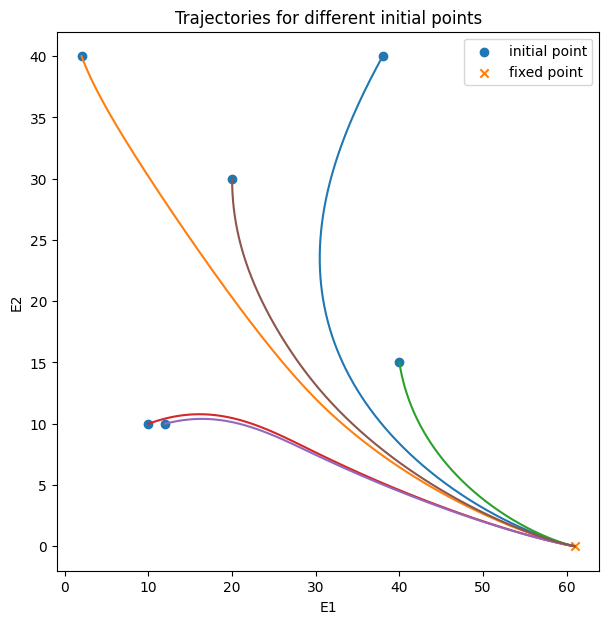

In [15]:
tau = 20
k1, k2 = 150, 90
T = 200
init_E1, init_E2 = [38, 2, 40, 10, 12, 20], [40, 40, 15, 10, 10, 30]

plt.rcParams["figure.figsize"]=(7,7)
for i in range(len(init_E1)):
    E1,E2 = winner_takes_all(init_E1[i], init_E2[i], k1, k2, tau, T)
    plt.plot(E1,E2)

plt.scatter(init_E1,init_E2,label="initial point")
plt.scatter([E1[-1]],[E2[-1]], label='fixed point', marker='x')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend(numpoints=1)
plt.title('Trajectories for different initial points')

Text(0.5, 1.0, 'initial value: E1=0.51, E2=55.51')

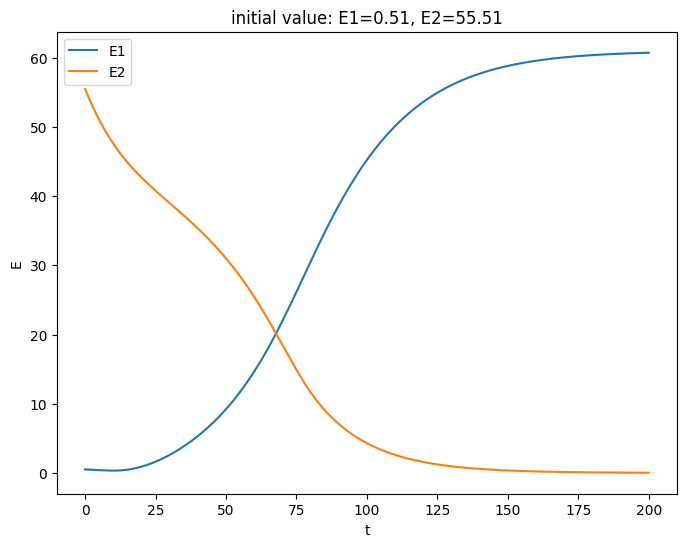

In [16]:
dt = 0.01
T0 = 200
T  = math.ceil(T0/dt)  # [ms]
t = np.arange(0,T)*dt
init_E1, init_E2 = 0.51, 55.51
k1, k2 = 150, 90
tau = 20

E1,E2 = winner_takes_all(init_E1, init_E2, k1, k2, tau, T0)

plt.rcParams["figure.figsize"]=(8,6)
plt.plot(t,E1, label="E1")
plt.plot(t,E2, label="E2")
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.title('initial value: E1='+str(init_E1) + ', E2=' +str(init_E2))

Text(0.5, 1.0, 'Vector field of E1 and E2 and their nullclines')

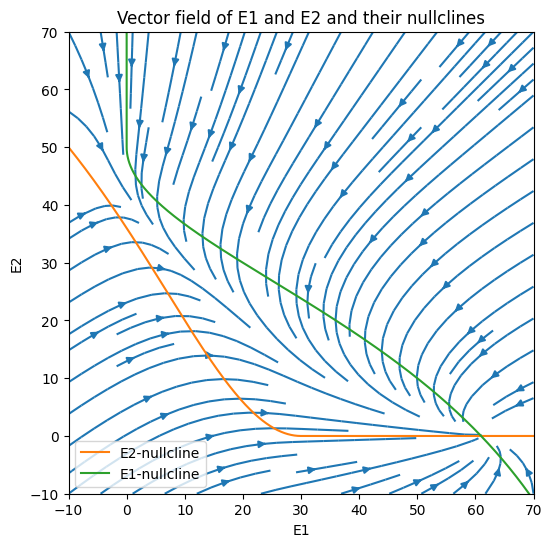

In [50]:
E1 = np.linspace(-10,70,1000)
E2 = np.linspace(-10,70,1000)

sigma = 120
N=2
M = 100
tau = 220
k1, k2 = 150, 90

# plotting vector field
e1, e2= np.meshgrid(E1,E2)
i1 = k2-3*e1
i2 = k1-3*e2
o1 = M*i1**N/(sigma**N+i1**N)
o2 = M*i2**N/(sigma**N+i2**N)
o1[i1 < 0] = 0
o2[i2 < 0] = 0
de1 = 1/tau * (-e1 + o2)
de2 = 1/tau * (-e2 + o1)
# Plot vector field
plt.rcParams["figure.figsize"]=(6,6)
plt.streamplot(e1,e2,de1,de2)

# plotting nullclines
indx1 = k2-3*E1
indx2 = k1-3*E2
out1 = M*indx1**N/(sigma**N+indx1**N)
out2 = M*indx2**N/(sigma**N+indx2**N)
out1[indx1 < 0] = 0
out2[indx2 < 0] = 0
plt.plot(E2, out1, label="E2-nullcline")
plt.plot(out2, E1, label="E1-nullcline")
plt.legend()
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Vector field of E1 and E2 and their nullclines')

Text(0.5, 1.0, 'Trajectories for different initial points')

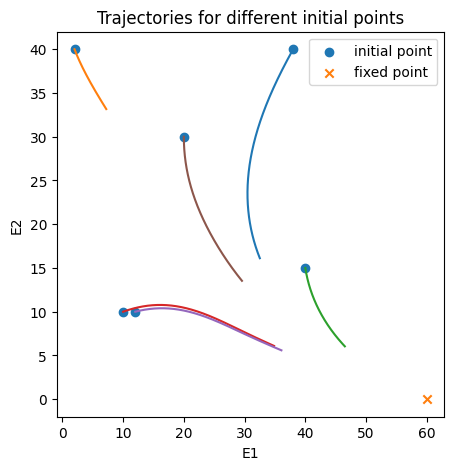

In [17]:
tau = 220
k1, k2 = 150, 90
T = 200
init_E1, init_E2 = [38, 2, 40, 10, 12, 20], [40, 40, 15, 10, 10, 30]

plt.rcParams["figure.figsize"]=(5,5)
for i in range(len(init_E1)):
    E1,E2 = winner_takes_all(init_E1[i], init_E2[i], k1, k2, tau, T)
    plt.plot(E1,E2)

plt.scatter(init_E1,init_E2,label="initial point")
plt.scatter([60],[0], label='fixed point', marker='x')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend(numpoints=1)
plt.title('Trajectories for different initial points')

Text(0.5, 1.0, 'initial value: E1=0.51, E2=55.51')

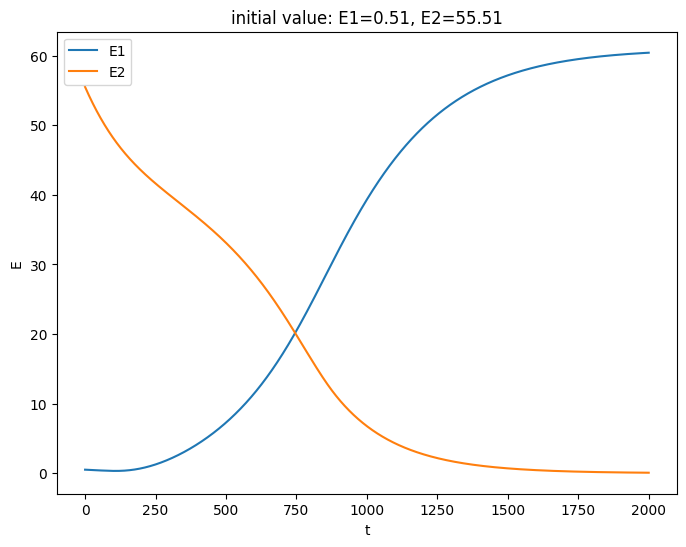

In [71]:
dt = 0.01
T0 = 2000
T  = math.ceil(T0/dt)  # [ms]
t = np.arange(0,T)*dt
init_E1, init_E2 = 0.51, 55.51
k1, k2 = 150, 90
tau = 220

E1,E2 = winner_takes_all(init_E1, init_E2, k1, k2, tau, T0)

plt.rcParams["figure.figsize"]=(8,6)
plt.plot(t,E1, label="E1")
plt.plot(t,E2, label="E2")
plt.legend()
plt.xlabel('t')
plt.ylabel('E')
plt.title('initial value: E1='+str(init_E1) + ', E2=' +str(init_E2))